## Setups

In [1]:
'''Here are all the modules we will be using in this notebook. Make sure you can import everything before moving on!'''

import numpy as np
import pandas as pd
import tensorflow as tf

import sys
import os
sys.path.append(os.path.abspath('./src'))
from model import *
from transformer import *
from observer import *

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

data_root = './data/'

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def dyn_plot(history):
    plt.clf()
    plt.plot(history)
    display.clear_output(wait=True)
    display.display(plt.gcf())

## Prepping the data

In [3]:
raw_df = pd.read_hdf(data_root + 'train.h5')

raw_sample_df = raw_df[raw_df['id'].isin([2047,1738])]
raw_df = None # Release memory

In [4]:
train_prop = 0.66
num_obs = raw_sample_df.shape[0]

train_df = raw_sample_df[:int(num_obs*train_prop)]

## Fit fit fit!

In [5]:
transf = Transformer()
transf.fit(train_df)

scaled_train_df = transf.transform(train_df)

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
num_epoch = 25
batch_size = 2
num_feat = 109
lstm_size = 32
fc_hidd_size = 16
lr = 1e-3

M = Model(num_feat=num_feat, lstm_size=lstm_size, fc_hidd_size=fc_hidd_size, lr=lr)
session = tf.Session()
session.run(tf.global_variables_initializer())

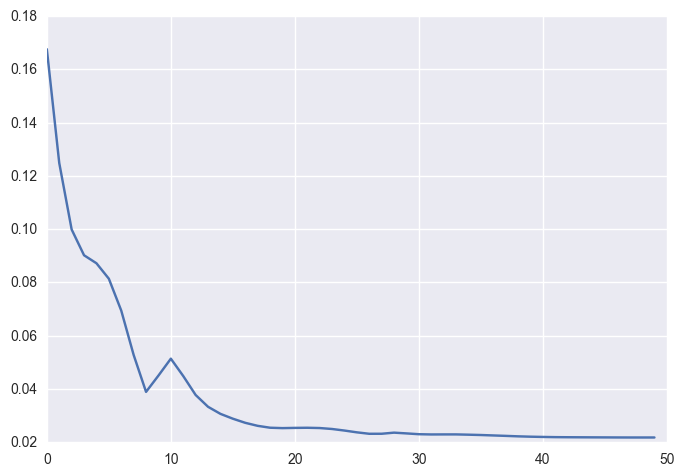

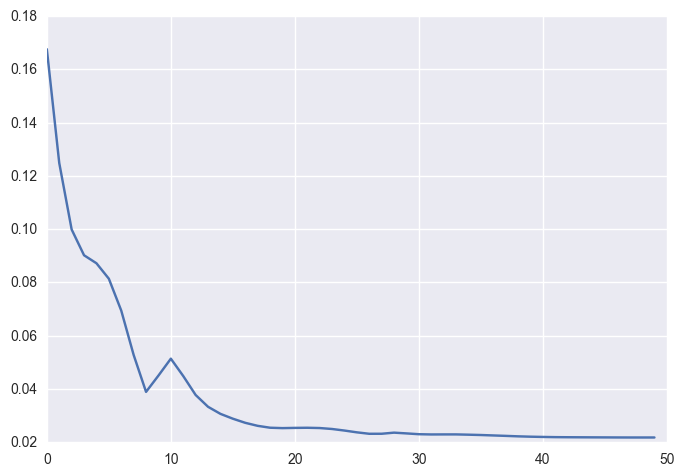

In [7]:
history = []
for loss in M.fit_on_sample(session, scaled_train_df, num_epoch, batch_size):
    history.append(loss)
    dyn_plot(np.sqrt(history))

## Check how we did

In [8]:
scaled_test_df = transf.transform(raw_sample_df)

In [9]:
feats_list = []
ys_list = []
ids_list = []
for _id,df in scaled_test_df.groupby('id'):
    feats_list.append(np.expand_dims(df.drop(['id', 'y'], axis=1).values,axis=0))
    ys_list.append(df['y'].values)
    ids_list.append(_id)

In [10]:
test_x_vals = np.concatenate(feats_list,axis=0)

In [11]:
pred, _ = M.predict(sequence=test_x_vals,
                    sequence_length=np.array([test_x_vals.shape[1]]),
                    session=session)

InvalidArgumentError: assertion failed: [Expected shape for Tensor sequence_length_1:0 is ] [2] [ but saw shape: ] [1]
	 [[Node: RNN/Assert/Assert = Assert[T=[DT_STRING, DT_INT32, DT_STRING, DT_INT32], summarize=3, _device="/job:localhost/replica:0/task:0/cpu:0"](RNN/All, RNN/Assert/Assert/data_0, RNN/pack, RNN/Assert/Assert/data_2, RNN/Shape_1)]]

Caused by op u'RNN/Assert/Assert', defined at:
  File "/usr/local/Cellar/python/2.7.12_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/local/Cellar/python/2.7.12_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-879521e6fb81>", line 8, in <module>
    M = Model(num_feat=num_feat, lstm_size=lstm_size, fc_hidd_size=fc_hidd_size, lr=lr)
  File "/Users/mteoh/projects/kaggle/two-sigma-kaggle/src/model.py", line 24, in __init__
    self.build_graph()
  File "/Users/mteoh/projects/kaggle/two-sigma-kaggle/src/model.py", line 59, in build_graph
    inputs=self.X
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/ops/rnn.py", line 832, in dynamic_rnn
    [_assert_has_shape(sequence_length, [batch_size])]):
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/ops/rnn.py", line 827, in _assert_has_shape
    packed_shape, " but saw shape: ", x_shape])
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/ops/control_flow_ops.py", line 140, in Assert
    condition, data, summarize, name="Assert")
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/ops/gen_logging_ops.py", line 39, in _assert
    summarize=summarize, name=name)
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): assertion failed: [Expected shape for Tensor sequence_length_1:0 is ] [2] [ but saw shape: ] [1]
	 [[Node: RNN/Assert/Assert = Assert[T=[DT_STRING, DT_INT32, DT_STRING, DT_INT32], summarize=3, _device="/job:localhost/replica:0/task:0/cpu:0"](RNN/All, RNN/Assert/Assert/data_0, RNN/pack, RNN/Assert/Assert/data_2, RNN/Shape_1)]]
